In [78]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split #데이터 전처리 - train, test 분리 random_state=42
from sklearn.neighbors import KNeighborsClassifier #분류/ 데이터 학습하기
from sklearn.neighbors import KNeighborsRegressor  #회귀 예측
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.preprocessing import PolynomialFeatures #끝난 뒤 특성을 추가해서 모델을 적용
from sklearn.preprocessing import StandardScaler #표준화작업 (instead of 데이터값 - 평균/ 표준편차) - 전처리 전
from sklearn.linear_model import Ridge #릿지회귀
from scipy.special import softmax # 행 하나하나 1로 맞춤
from sklearn.linear_model import LogisticRegression #로지스틱 - 맞출 확률을 나타내는 것(1에 가깝게)
from sklearn.linear_model import SGDClassifier #경사하강법 - 머신러닝을 훈련하는 방법, 다 끝나고 정답률 높이기 위해 
from statsmodels.stats.outliers_influence import variance_inflation_factor #회귀분석 예측 - 고려사항 체크
import statsmodels.api as sm # train set 평가서 볼 수 있는 모듈
from sklearn.model_selection import cross_validate # 머신러닝 - cross_validate
from sklearn.ensemble import RandomForestClassifier
from collections import Counter #counter 함수

from scipy import stats # t-test
from tensorflow import keras
from konlpy.tag import Okt  #텍스트마이닝
import operator
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import oracledb
import random
import seaborn as sns
import glob,os.path,re
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [79]:
from tensorflow import keras

In [80]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [81]:
train_input.shape

(60000, 28, 28)

In [82]:
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28)  # [[28],[28]*28...] -> [28] 하나로 flatten층으로 만듦 -> 이미지 모양 그대로 적용
train_scaled.shape

(60000, 28, 28)

In [83]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state= 42
)

In [84]:
train_scaled.shape

(48000, 28, 28)

In [85]:
# 머신러닝
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# model.summary()
# 모델설정 옵티마이저 - adam(최적화 알고리즘 찾는 것 -> 최저 손실률을 찾음)
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)

In [86]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid 
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [89]:
model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.7702 - loss: 0.6680
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.8534 - loss: 0.4075
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.8709 - loss: 0.3549
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.8825 - loss: 0.3341
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.8861 - loss: 0.3094
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.8944 - loss: 0.2894
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.8937 - loss: 0.2872
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.8997 - loss: 0.2719
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.9041 - loss: 0.2568
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.9078 - loss: 0.2449
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.9107 - loss: 0.2402
Epoch 12

In [90]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.8883 - loss: 0.3523


[0.35225751996040344, 0.8856666684150696]

epochs = 20 -> 훈련세트 정확도가 높아짐\
검증세트를 가지고 정확도를 측정

In [91]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [92]:
# epochs 돌 때마다 loss, accuracy 값을 저장
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 771us/step - accuracy: 0.9293 - loss: 0.1894
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.9355 - loss: 0.1704
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - accuracy: 0.9379 - loss: 0.1669
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.9376 - loss: 0.1660
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.9360 - loss: 0.1693
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.9377 - loss: 0.1626
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.9399 - loss: 0.1586
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.9434 - loss: 0.1537
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.9428 - loss: 0.1509
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.9455 - loss: 0.1448
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.9455 - loss: 0.1433
Epoch 12

In [93]:
# histroy key index를 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [94]:
history.history['loss']

[0.1858227550983429,
 0.1782403141260147,
 0.17514392733573914,
 0.1695934385061264,
 0.16682034730911255,
 0.1646580845117569,
 0.1622384786605835,
 0.1576351374387741,
 0.15343113243579865,
 0.14828188717365265,
 0.14768008887767792,
 0.14305198192596436,
 0.14066290855407715,
 0.13877850770950317,
 0.13760146498680115,
 0.1369021087884903,
 0.13058526813983917,
 0.1287240833044052,
 0.1271839588880539,
 0.1235940158367157]

In [95]:
history.history['accuracy']  #history->변수.history['accuracy']

[0.9308541417121887,
 0.9323541522026062,
 0.9337708353996277,
 0.9358333349227905,
 0.9365416765213013,
 0.9376458525657654,
 0.9388124942779541,
 0.940666675567627,
 0.9426666498184204,
 0.9444583058357239,
 0.9437916874885559,
 0.9465000033378601,
 0.9462916851043701,
 0.9480624794960022,
 0.948520839214325,
 0.9482499957084656,
 0.9512291550636292,
 0.9522291421890259,
 0.953083336353302,
 0.95333331823349]

train세트 검증데이터(loss, accuracy) 그래프를 그림 - history 정보를 바탕

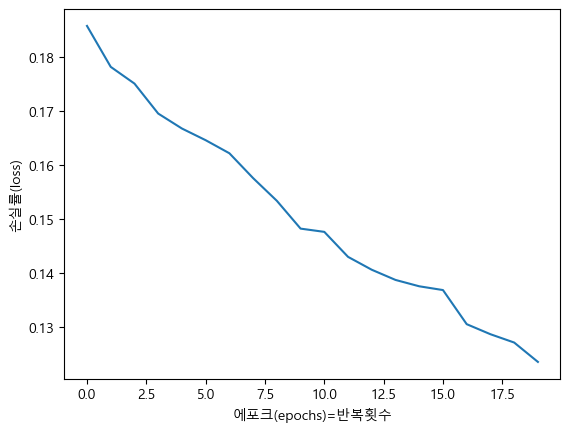

In [96]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)=반복횟수')
plt.ylabel('손실률(loss)')
plt.savefig('m0529_03', dpi =300) # 새로 파일 생성
plt.show()

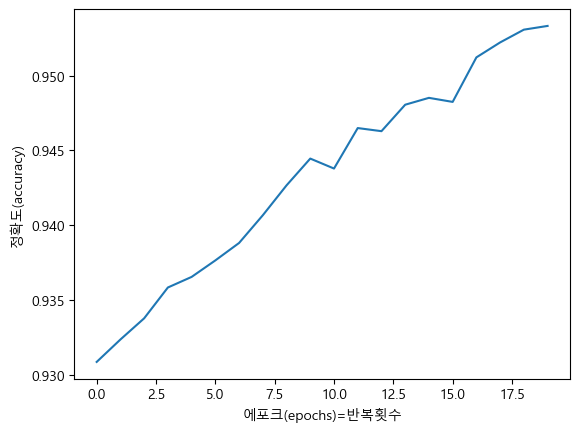

In [97]:
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(epochs)=반복횟수')
plt.ylabel('정확도(accuracy)')
plt.show()

검증세트도 함께 검증

In [98]:
# val(검증) 세트도 함께 검증 - history 정보로 받을 수 있음.
# model.fit - loss, accuracy 정보를 리턴(history)

In [108]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [109]:
# train_scaled, val_scaled 함께 훈련시킴
model.fit(train_scaled, train_target, epochs=5,
          validation_data=(val_scaled, val_target))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.9661 - loss: 0.0879 - val_accuracy: 0.9175 - val_loss: 0.2929
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.9676 - loss: 0.0829 - val_accuracy: 0.9173 - val_loss: 0.2935
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.9675 - loss: 0.0868 - val_accuracy: 0.9132 - val_loss: 0.3356
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.9696 - loss: 0.0803 - val_accuracy: 0.9143 - val_loss: 0.3199
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.9698 - loss: 0.0795 - val_accuracy: 0.9136 - val_loss: 0.3531


In [110]:
# 총 4개의 속성 - val세트 2개, train 세트 2개
history.history.keys()

dict_keys(['accuracy', 'loss'])

KeyError: 'val_loss'

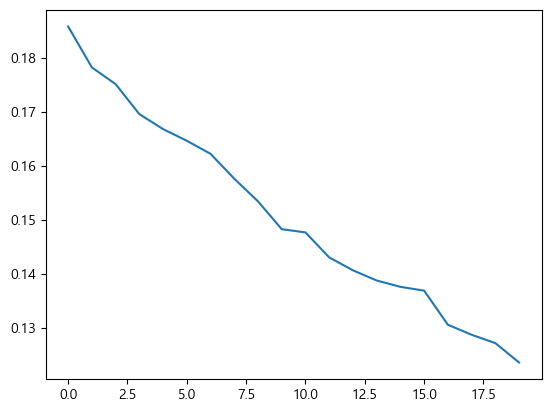

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)=반복횟수')
plt.ylabel('손실률(loss)')
plt.show()

KeyError: 'val_accracy'

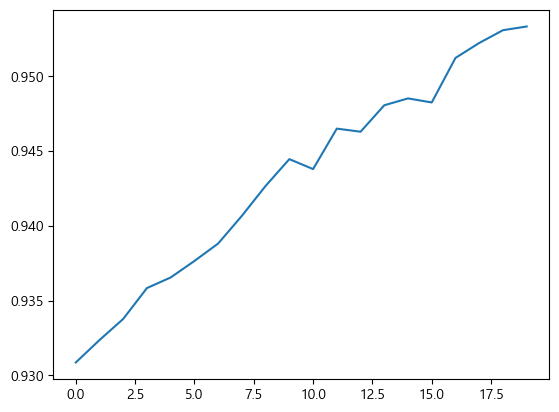

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accracy'])
plt.show()